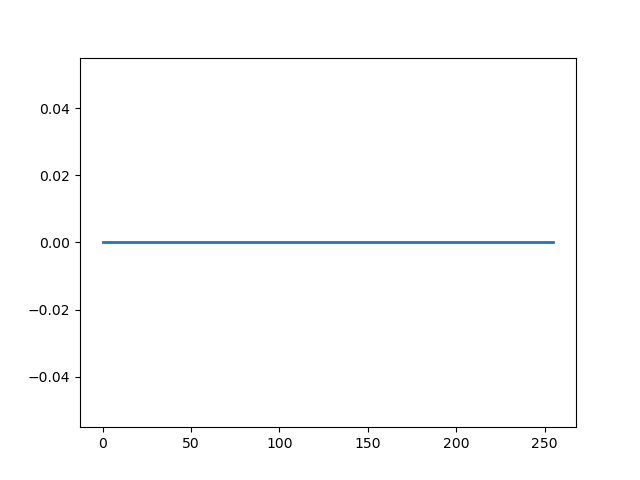

In [1]:
%matplotlib widget

import serial
import time
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import csv

# Initialize serial connection
ser = serial.Serial("COM8", 115200, timeout=1)
if not ser.is_open:
    ser = serial.Serial("COM7", 115200, timeout=1)

# Initialize data
x = np.arange(256)
y = np.zeros(256)

# Create a figure and axis
fig, ax = plt.subplots()
line, = ax.plot(x, y, lw=2)

def init():
    ax.set_title('Live CSI Animation')
    ax.set_xlabel('X')
    ax.set_ylabel('CSI')
    ax.set_xlim(0, 256)  # Adjust if needed
    ax.set_ylim(-100, 300)  # Adjust based on expected data range
    line.set_data(x, np.zeros_like(x))
    return line,

def update(frame):
    line.set_ydata(frame)
    return line,

def data_gen():
    while True:
        if ser.in_waiting > 0:
            line = ser.readline().decode('utf-8').rstrip()
            print(f"Received: {line}")  # Debugging line
            timestamp = time.strftime('%Y-%m-%d %H:%M:%S')
            if re.match(r'^-?\d+(\s-?\d+)*$', line):
                data = [int(i) for i in line.split(' ')]
                print(f"Parsed Data: {data}")  # Debugging line
                with open("CSI.csv", "a", newline='') as csvfile:
                    csvwriter = csv.writer(csvfile)
                    csvwriter.writerow([timestamp] + data)
                yield np.array(data)

plt.ion()
ani = animation.FuncAnimation(fig, update, frames=data_gen, init_func=init, blit=True,interval=40, cache_frame_data=False)
plt.show()
